In [3]:
import numpy as np #linear algebra
import pandas as pd #data processino
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('E:/pythonWorkspace/excelFiles/wine.csv',header=0,usecols=[0,1,2]) 
#header=0 : previous deletes and get name changed new one. header=None : both existing and new one appears


In [5]:
df.columns=['wine','Alcohol','Malic acid']



In [6]:
df
df.shape

(178, 3)

<AxesSubplot: xlabel='Alcohol', ylabel='Density'>

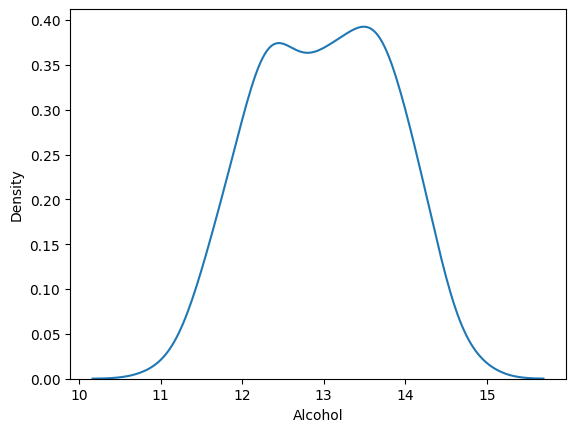

In [7]:
sns.kdeplot(df['Alcohol']) #kde : kernal distrivution plot which depicts the probablity density fun of the continouts or non-parametric datavariale

<AxesSubplot: xlabel='Malic acid', ylabel='Density'>

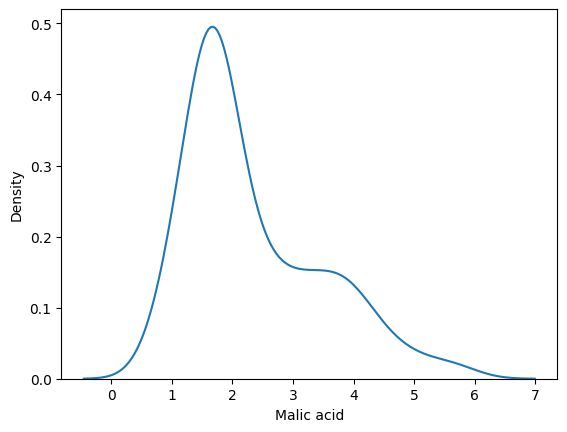

In [8]:
sns.kdeplot(df['Malic acid'])

<AxesSubplot: xlabel='Alcohol', ylabel='Malic acid'>

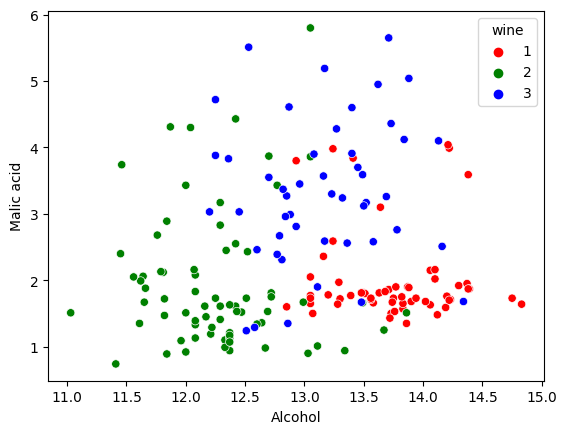

In [9]:
color_dict = {1:'red',2:'green',3:'blue'}
sns.scatterplot(x = df['Alcohol'],y = df['Malic acid'],hue=df['wine'],palette=color_dict)

In [10]:
#in any type of scaling, first u gotta train-split it

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df.drop('wine',axis=1),df['wine'],test_size=0.3,random_state=0)

In [12]:
x_train.shape, x_test.shape #124 + 54 = 178 (which is the whole data)

((124, 2), (54, 2))

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() #obj created!

In [14]:
#fit the scalar to the train set, it'll learn the para
scaler.fit(x_train) #fit sirf train ko krenge, transform dono ko krenge

MinMaxScaler()

In [15]:
#transform train and test data
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [18]:
#skitelearn classes use krne ke bad dataframe ko numpyArray me convert krta hai,
#so, to handle that againg convet into dataframe

x_train_scaled = pd.DataFrame(x_train_scaled, columns = x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled,columns = x_test.columns)

In [19]:
#old data has described(mean,mode,sd,median)
np.round(x_train.describe(),1)

,Alcohol,Malic acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


In [21]:
np.round(x_test_scaled.describe(),1) 
#yess!!!, min = zero and max 1

,Alcohol,Malic acid
count,54.0,54.0
mean,0.5,0.3
std,0.2,0.2
min,0.1,-0.0
25%,0.4,0.1
50%,0.5,0.2
75%,0.7,0.4
max,1.0,1.0


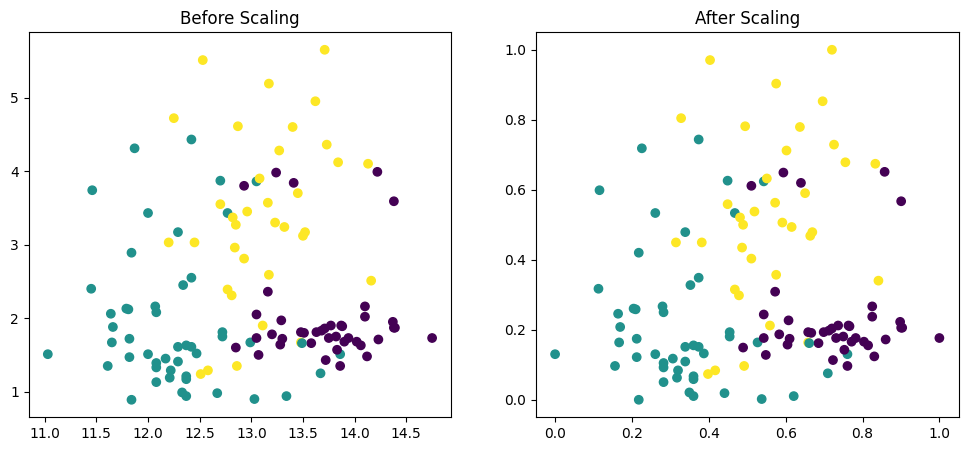

In [25]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(x_train['Alcohol'], x_train['Malic acid'],c=y_train)
ax1.set_title("Before Scaling")
ax2.scatter(x_train_scaled['Alcohol'], x_train_scaled['Malic acid'],c=y_train)
ax2.set_title("After Scaling")
plt.show()

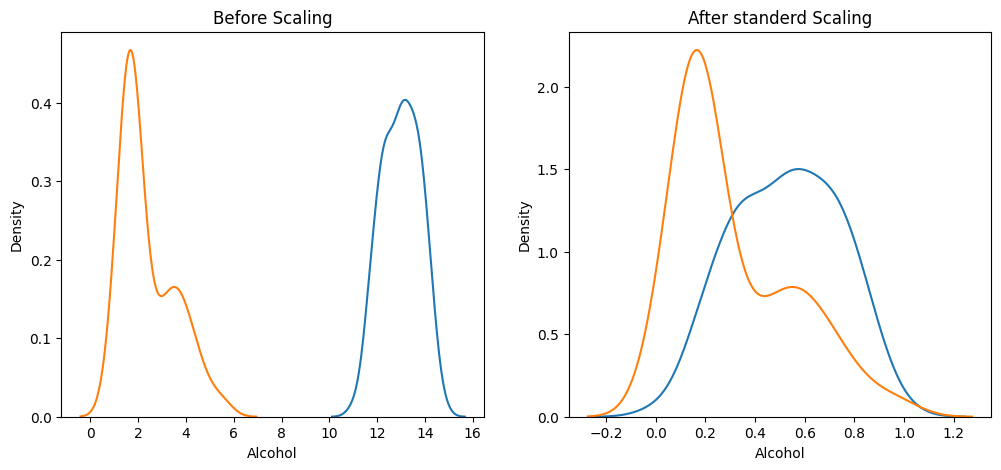

In [29]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

#befor scaling
ax1.set_title('Before Scaling')
sns.kdeplot(x_train['Alcohol'],ax=ax1)
sns.kdeplot(x_train['Malic acid'],ax=ax1)

#after scaling
ax2.set_title('After standerd Scaling')
sns.kdeplot(x_train_scaled['Alcohol'],ax=ax2)
sns.kdeplot(x_train_scaled['Malic acid'],ax=ax2)
plt.show()

#see!!! scaling ka kitna fayda hai...
#dono same range me aa gye zero to 1 range me
#bit diff coz kde plot inference leta hai, kindda statistic part

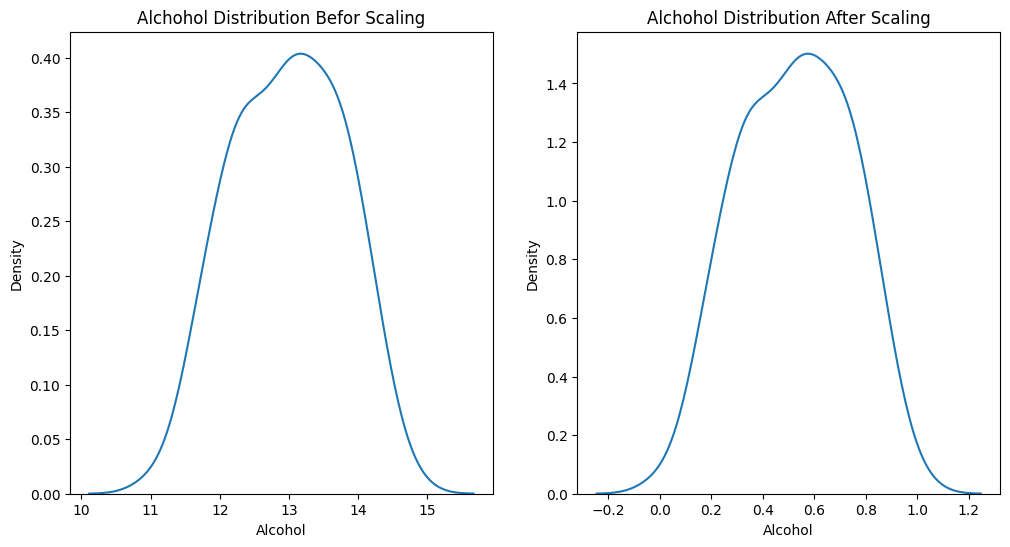

In [35]:
fig, (ax1 , ax2) = plt.subplots(ncols =2 , figsize = (12,6))

ax1.set_title('Alchohol Distribution Befor Scaling')
sns.kdeplot(x_train['Alcohol'],ax=ax1)

ax2.set_title('Alchohol Distribution After Scaling')
sns.kdeplot(x_train_scaled['Alcohol'],ax=ax2)
plt.show()

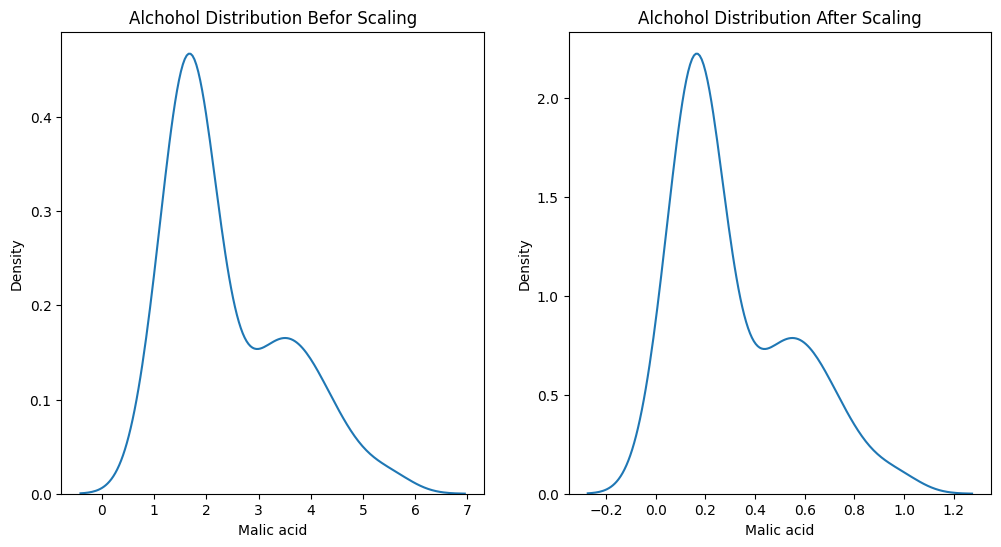

In [37]:
fig, (ax1 , ax2) = plt.subplots(ncols =2 , figsize = (12,6))

ax1.set_title('Alchohol Distribution Befor Scaling')
sns.kdeplot(x_train['Malic acid'],ax=ax1)

ax2.set_title('Alchohol Distribution After Scaling')
sns.kdeplot(x_train_scaled['Malic acid'],ax=ax2)
plt.show()

#same no diff only range had chaned on axix